In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# projct over view
customer-payments-orders-product
Q
- 1 top 10 products
- 2 top 10 categories
- 3 top 10 cities
 4 top 10 customers
5 sales over 2 years
6 top products per state
7 top produts per city
8 lowest products per state
9 lowest produts per city
10 top produts per payment method
11 monthly sales top and low
12 months per method
13 categores
14 hours
15 product and sals

In [6]:
customrs=pd.read_csv('data/olist_customers_dataset.csv')
geo=pd.read_csv('data/olist_geolocation_dataset.csv')
items=pd.read_csv('data/olist_order_items_dataset.csv')
payments=pd.read_csv('data/olist_order_payments_dataset.csv')
reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')
orders=pd.read_csv('data/olist_orders_dataset.csv')
products=pd.read_csv('data/olist_products_dataset.csv')
sellers=pd.read_csv('data/olist_sellers_dataset.csv')
category=pd.read_csv('data/product_category_name_translation.csv')


In [7]:
df1=pd.merge(orders,payments,on='order_id')
df2=pd.merge(df1,customrs,on='customer_id')
df3=pd.merge(df2,items,on='order_id')
df=pd.merge(df3,products,on='product_id')
df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,credit_card,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
117597,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,credit_card,...,356.00,18.12,esporte_lazer,53.0,1105.0,1.0,2800.0,28.0,23.0,23.0
117598,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,credit_card,...,55.90,15.14,instrumentos_musicais,34.0,372.0,2.0,300.0,16.0,6.0,12.0
117599,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,...,72.00,13.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0


In [8]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weig

In [9]:
df['payment_value'].sum()

20308134.709999997

# top 10 categories


<AxesSubplot:title={'center':' catigories'}, xlabel='category name', ylabel='number of payments'>

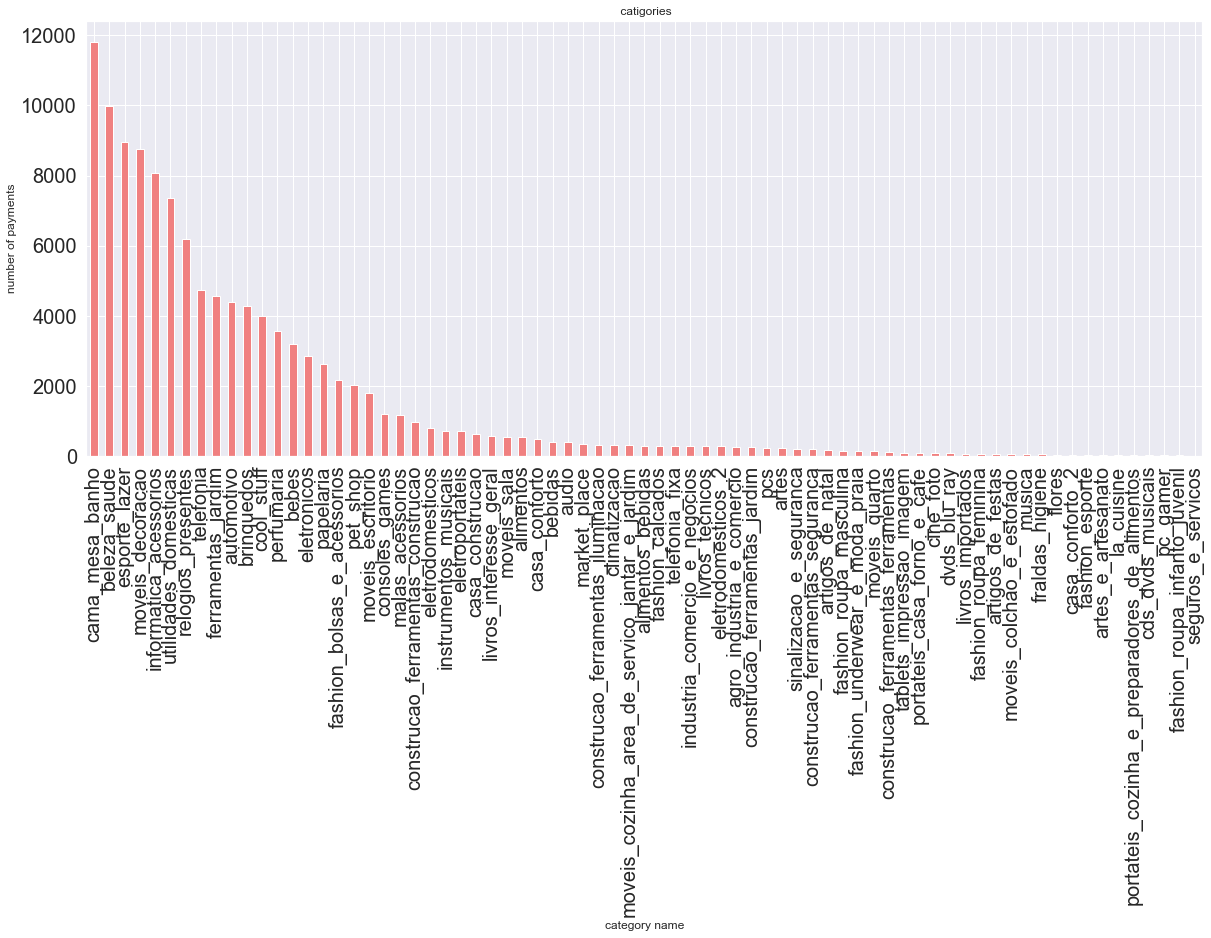

In [10]:
catigories=df['product_category_name'].value_counts()
catigories.plot.bar(figsize=(20,8),title=' catigories',color='LightCoral',xlabel='category name',ylabel='number of payments',fontsize=20)

<AxesSubplot:title={'center':' top catigories'}, xlabel='category name', ylabel='number of payments'>

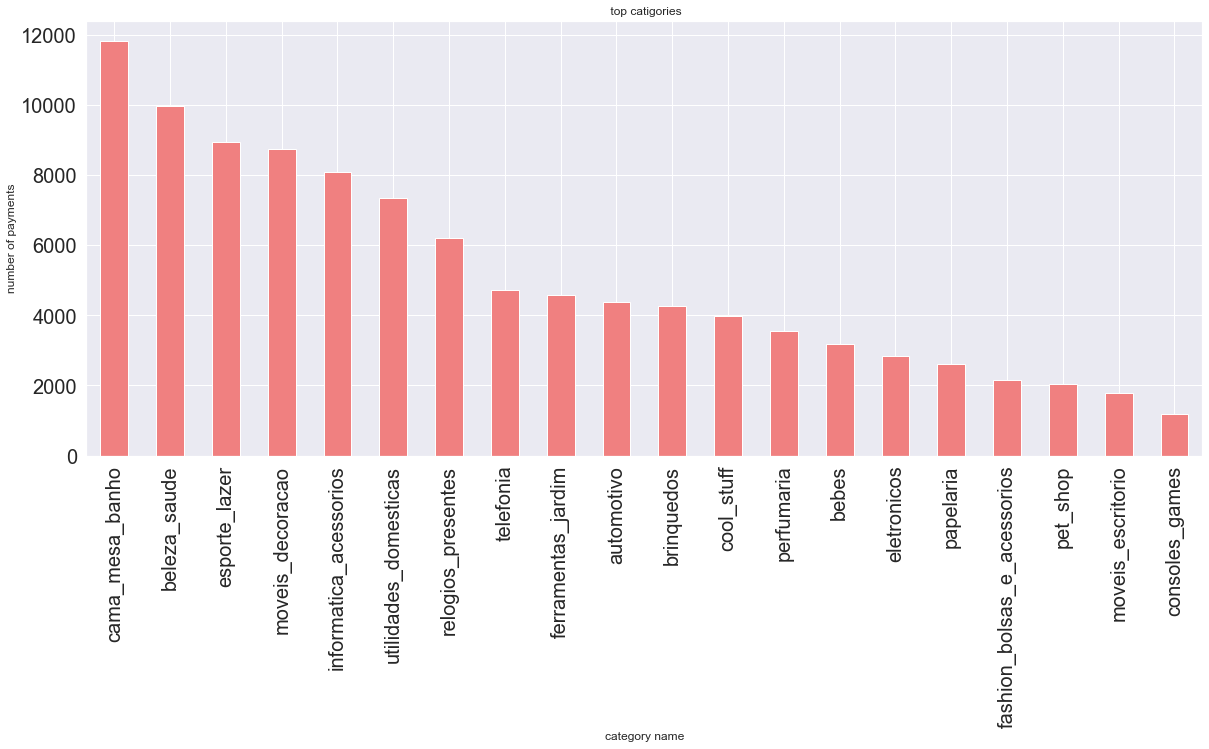

In [11]:
top_catigories=df['product_category_name'].value_counts()[:20]
top_catigories.plot.bar(figsize=(20,8),title=' top catigories',color='LightCoral',xlabel='category name',ylabel='number of payments',fontsize=20)

<AxesSubplot:title={'center':' top catigories'}, xlabel='category name', ylabel='number of payments'>

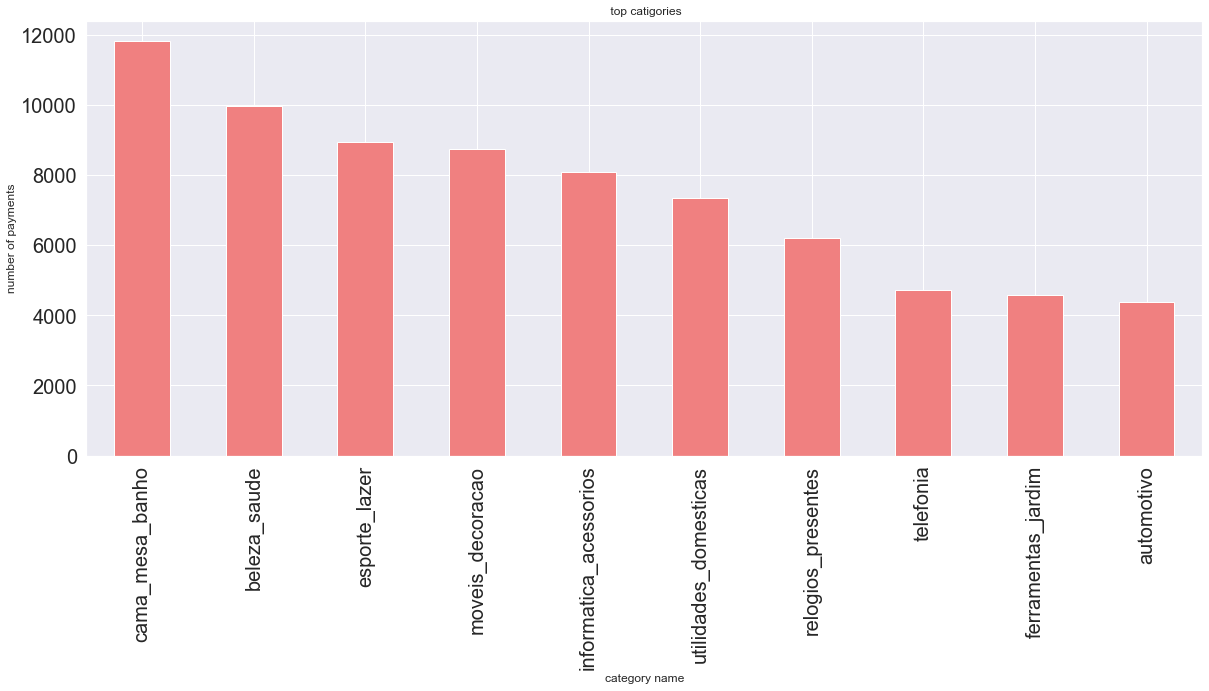

In [12]:
top_catigories=df['product_category_name'].value_counts()[:10]
top_catigories.plot.bar(figsize=(20,8),title=' top catigories',color='LightCoral',xlabel='category name',ylabel='number of payments',fontsize=20)

<AxesSubplot:title={'center':' lowest catigories'}, xlabel='category name', ylabel='number of payments'>

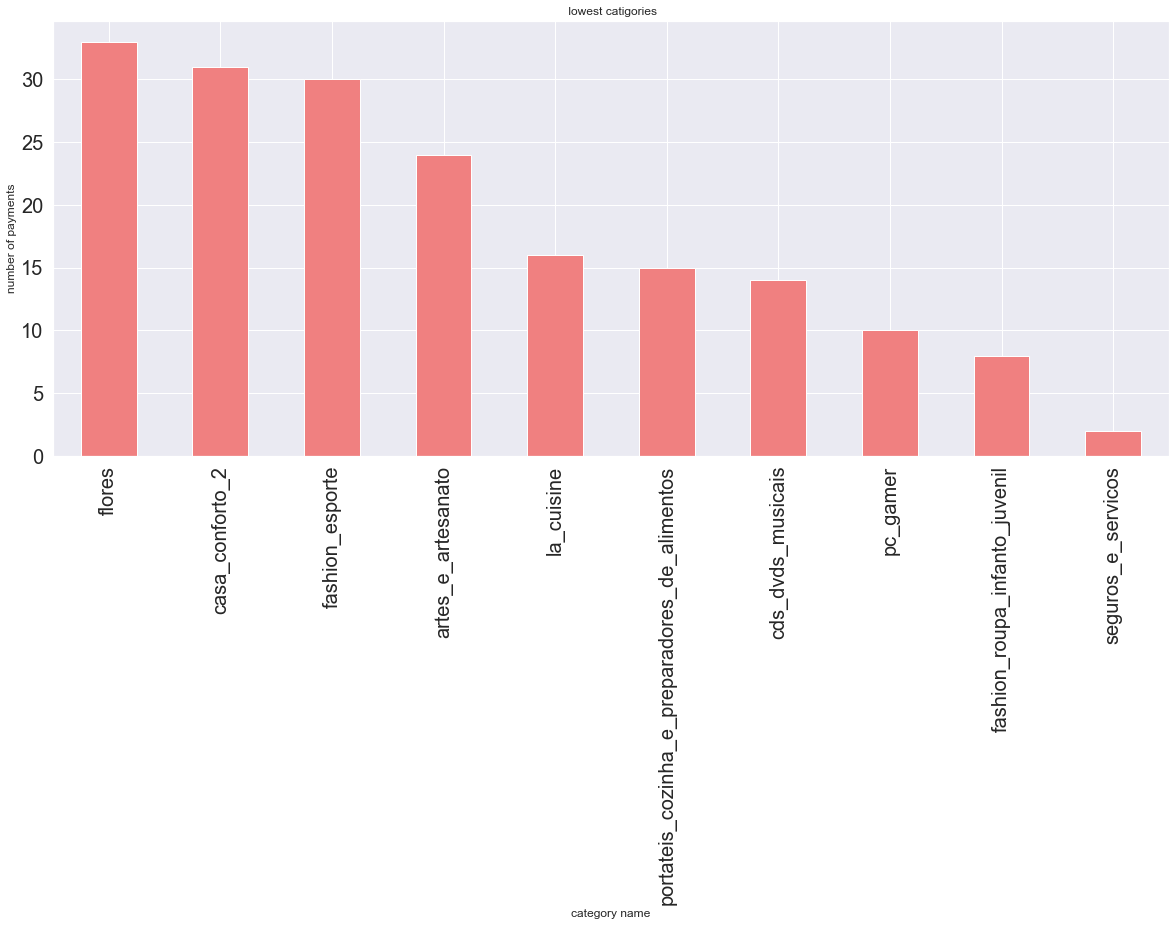

In [13]:
lowest_catigories=df['product_category_name'].value_counts()[-10:]
lowest_catigories.plot.bar(figsize=(20,8),title=' lowest catigories',color='LightCoral',xlabel='category name',ylabel='number of payments',fontsize=20)

<AxesSubplot:title={'center':' customer_state'}, xlabel='state', ylabel='number of payments'>

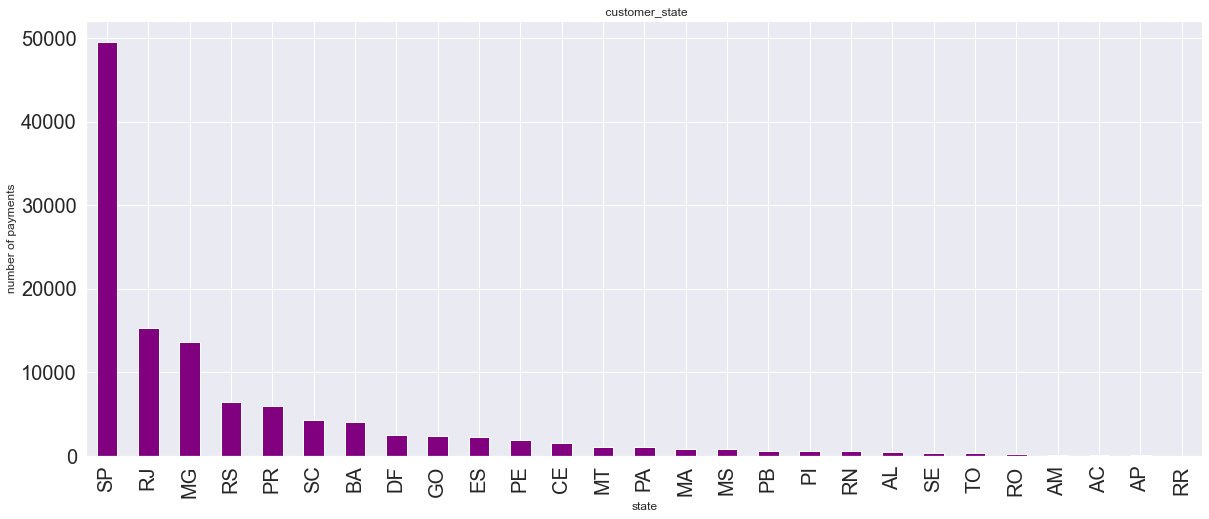

In [14]:
customer_state=df['customer_state'].value_counts()[:]
customer_state.plot.bar(figsize=(20,8),title=' customer_state',color='purple',xlabel='state',ylabel='number of payments',fontsize=20)

In [15]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

<AxesSubplot:title={'center':' customer_state'}, xlabel='state', ylabel='number of payments'>

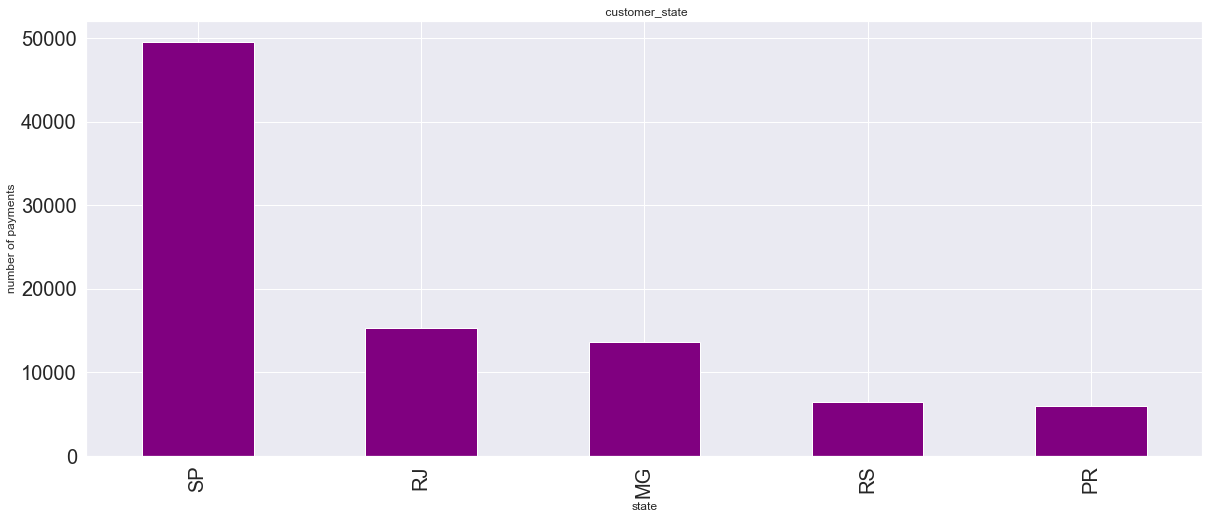

In [16]:
customer_state=df['customer_state'].value_counts()[:5]
customer_state.plot.bar(figsize=(20,8),title=' customer_state',color='purple',xlabel='state',ylabel='number of payments',fontsize=20)

<AxesSubplot:title={'center':' customer_state'}, xlabel='state', ylabel='number of payments'>

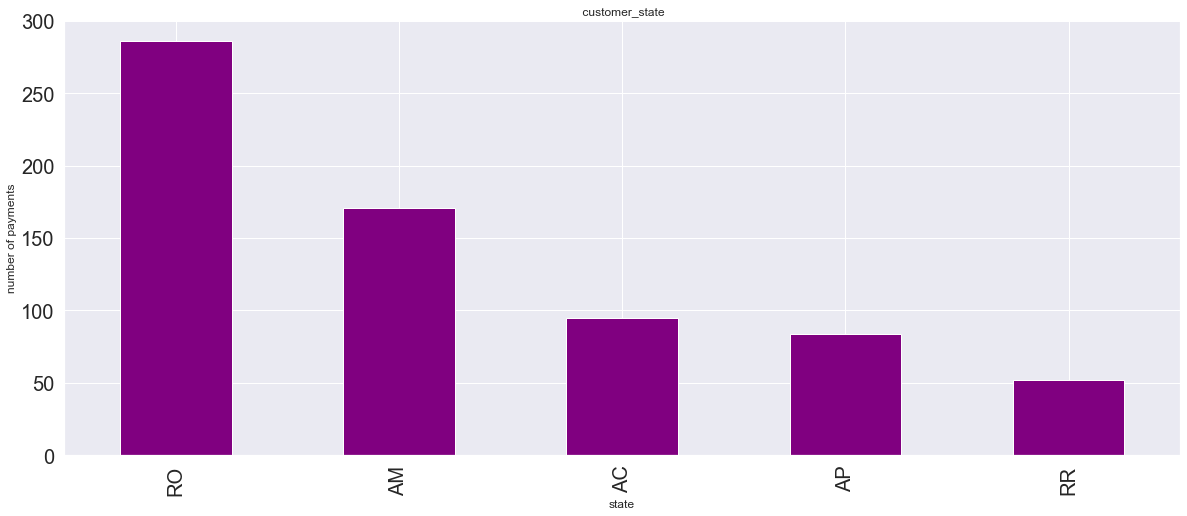

In [17]:
customer_state=df['customer_state'].value_counts()[-5:]
customer_state.plot.bar(figsize=(20,8),title=' customer_state',color='purple',xlabel='state',ylabel='number of payments',fontsize=20)

<AxesSubplot:title={'center':' customer_city'}, xlabel='city', ylabel='number of payments'>

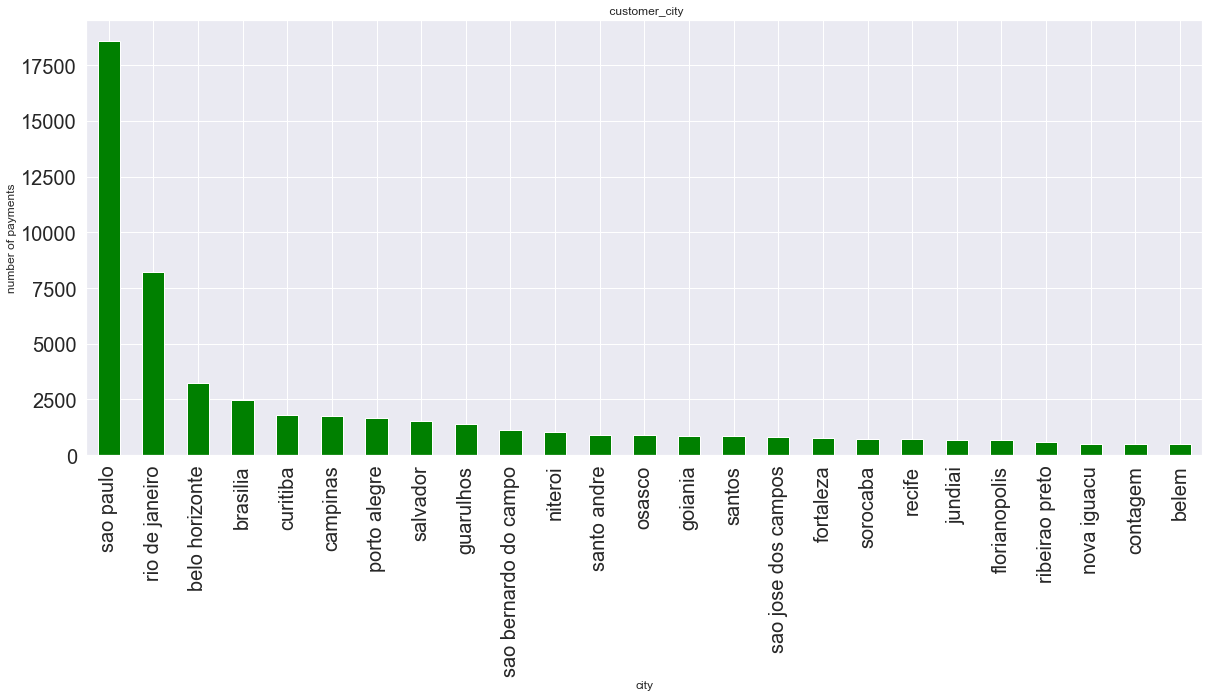

In [18]:
customer_city=df['customer_city'].value_counts()[:25]
customer_city.plot.bar(figsize=(20,8),title=' customer_city',color='green',xlabel='city',ylabel='number of payments',fontsize=20)

<AxesSubplot:title={'center':' customer_city'}, xlabel='city', ylabel='number of payments'>

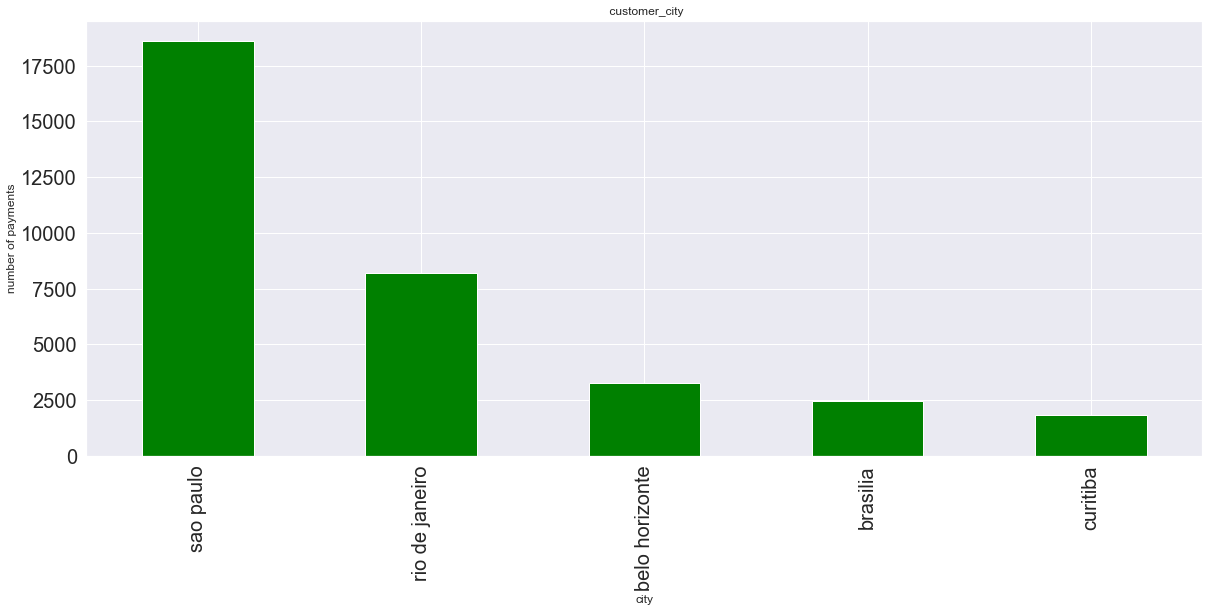

In [19]:
customer_city=df['customer_city'].value_counts()[:5]
customer_city.plot.bar(figsize=(20,8),title=' customer_city',color='green',xlabel='city',ylabel='number of payments',fontsize=20)

In [20]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [21]:
df.to_csv('df.csv')

In [22]:
customrs.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14864,031a4751690cb362510c7b55428f7fff,7ca7d05c3739c2094a9e6d508877cd12,11700,praia grande,SP
669,686ba249f6f98cc2610b58e5b9982e6a,70a8db6a5ae17c3a4e5df68bbeae451c,25963,teresopolis,RJ
39352,2456f8d019f041c966cd1d26e4759774,69ba177350bd489817ce4053c9834e65,31990,belo horizonte,MG
93620,c73c9dcfbc22dd5f107fe8ac7382978a,1a2e7faa3054228a9b5b2a7f24b7e580,25965,teresopolis,RJ
39190,eb914f782da6a9bb3aeeabfd71c3966b,08ffe6a08d671b0f294897bd26b447f6,7716,caieiras,SP


In [23]:
customrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [24]:
customrs.duplicated().sum()

0

In [25]:
customrs['customer_city'].value_counts()

sao paulo               15540
rio de janeiro           6882
belo horizonte           2773
brasilia                 2131
curitiba                 1521
                        ...  
capistrano                  1
alegrete do piaui           1
taquarana                   1
maiquinique                 1
conselheiro mairinck        1
Name: customer_city, Length: 4119, dtype: int64

In [26]:
customrs['customer_state'].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [27]:
geo.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
803504,75114,-16.344226,-48.935893,anapolis,GO
669729,40170,-13.008526,-38.511003,salvador,BA
126798,5351,-23.561205,-46.756483,sao paulo,SP
504566,27253,-22.517059,-44.086424,volta redonda,RJ
397214,19020,-22.106545,-51.388356,presidente prudente,SP


In [28]:
geo.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [29]:
geo.duplicated().sum()

261831

In [30]:
geo['geolocation_zip_code_prefix'].value_counts()

24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
25875       1
28945       1
89909       1
7811        1
70210       1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [31]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [32]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [33]:
items.duplicated().sum()

0

In [34]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [35]:
payments.duplicated().sum()

0

In [36]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [37]:
reviews.duplicated().sum()

0

In [38]:
orders.dropna(inplace=True)

In [39]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [40]:
orders.duplicated().sum()

0

In [41]:
products.dropna(inplace=True)

In [42]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [43]:
products.duplicated().sum()

0

In [44]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
sellers.duplicated().sum()

0

In [46]:
category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [47]:
category.duplicated().sum()

0

In [48]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
66326,f35013d66cfcbe79e1bcedd6fb914278,9d8e0ad64a95c80b2816d44431f913bd,delivered,2018-08-04 10:38:17,2018-08-04 10:50:09,2018-08-07 15:14:00,2018-08-10 23:33:35,2018-08-14 00:00:00
7526,e636e64e725aeff4955e397f34162049,ca41515a2969625ffefbdf96099bbb85,delivered,2018-05-08 10:52:41,2018-05-10 03:49:54,2018-05-11 15:31:00,2018-05-16 18:28:49,2018-05-25 00:00:00
70022,e63e244ec02470ece2ac502d7548e3fd,34b10ac8b6807ba32d473de41885b2d3,delivered,2018-03-11 20:51:27,2018-03-11 21:00:44,2018-03-15 21:32:18,2018-04-10 21:03:31,2018-04-02 00:00:00
17174,ad6b96778fa5ce98470d51c8159a36dc,e797451a7e6ac3ef0dc569b73e144aa0,delivered,2017-12-13 21:35:36,2017-12-13 21:49:01,2017-12-15 00:33:58,2017-12-18 20:13:47,2018-01-02 00:00:00
12772,a60241fca336b3f14485dff30a172cab,2a3caad976ff659d519660a7c9357122,delivered,2018-07-27 22:05:26,2018-07-27 22:24:21,2018-07-30 09:15:00,2018-08-02 13:45:01,2018-08-20 00:00:00


In [49]:
items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
89513,cb4fa9a6d95ef2b84743087f2cac2b17,1,43f911ac50adc19a96cd523ade4e7cca,620c87c171fb2a6dd6e8bb4dec959fc6,2018-08-23 16:10:42,39.90,12.85
90814,ce457974a91b6bddfebdf60b46c71b45,1,81d7eb906ca211cac7d603e93fa5eece,92eb0f42c21942b6552362b9b114707d,2017-03-28 21:23:44,59.99,8.79
30878,4615129c8ec596bf8b287b95934c7b78,1,9b0ad21bbd4384f9ebc28a688e1e81cd,128639473a139ac0f3e5f5ade55873a5,2018-05-10 02:35:11,18.90,13.47
2543,05bb540accb9a3fc966280b894023c9c,1,154e7e31ebfa092203795c972e5804a6,cc419e0650a3c5ba77189a1882b7556a,2017-07-18 02:50:52,19.99,14.10
90127,ccb379daf2809ecb372b357caf254c33,2,818c2f4d29b94c0600bbc109c6fa0efd,26d6bbee02420494d471c9f6436929c0,2018-08-02 12:44:21,31.99,13.56


In [50]:
items['price'].sum().round(2)

13591643.7

In [51]:
# join orders table and order_payments table in order to see the relation of orders and time 
time_revenue_df = pd.merge(orders, payments, on='order_id')
time_revenue_df = time_revenue_df[['order_id','order_purchase_timestamp','payment_type','payment_value']]
time_revenue_df
# extract year/month/date/hour 
time_revenue_df['Year'] = pd.DatetimeIndex(time_revenue_df['order_purchase_timestamp']).year
time_revenue_df['Month'] = pd.DatetimeIndex(time_revenue_df['order_purchase_timestamp']).month
time_revenue_df['month_year'] = pd.to_datetime(time_revenue_df['order_purchase_timestamp']).dt.to_period('M')
time_revenue_df['Date'] = pd.DatetimeIndex(time_revenue_df['order_purchase_timestamp']).day
time_revenue_df['Day_name'] = pd.DatetimeIndex(time_revenue_df['order_purchase_timestamp']).strftime('%A')
time_revenue_df['Hour'] = pd.DatetimeIndex(time_revenue_df['order_purchase_timestamp']).hour
time_revenue_df['Quarter'] = pd.to_datetime(time_revenue_df['order_purchase_timestamp']).dt.to_period('Q')

time_revenue_df 

,order_id,order_purchase_timestamp,payment_type,payment_value,Year,Month,month_year,Date,Day_name,Hour,Quarter
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,credit_card,18.12,2017,10,2017-10,2,Monday,10,2017Q4
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,voucher,2.00,2017,10,2017-10,2,Monday,10,2017Q4
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,voucher,18.59,2017,10,2017-10,2,Monday,10,2017Q4
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,boleto,141.46,2018,7,2018-07,24,Tuesday,20,2018Q3
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,credit_card,179.12,2018,8,2018-08,8,Wednesday,8,2018Q3
...,...,...,...,...,...,...,...,...,...,...,...
100734,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,credit_card,85.08,2017,3,2017-03,9,Thursday,9,2017Q1
100735,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,credit_card,195.00,2018,2,2018-02,6,Tuesday,12,2018Q1
100736,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,credit_card,271.01,2017,8,2017-08,27,Sunday,14,2017Q3
100737,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,credit_card,441.16,2018,1,2018-01,8,Monday,21,2018Q1


In [52]:
monthly_profit = time_revenue_df.groupby('month_year',as_index=False).agg(
    {
     'payment_value':['sum']})
monthly_profit

,month_year,payment_value
,,sum
0,2016-10,47271.20
1,2016-12,19.62
2,2017-01,127430.74
3,2017-02,269458.98
4,2017-03,414369.39
5,2017-04,390952.18
6,2017-05,566872.73
7,2017-06,490225.60
8,2017-07,566403.93


In [53]:
monthly_profit.iloc[monthly_profit['payment_value'].idxmax()]

,month_year,payment_value
,,sum
12,2017-11,1153393.22


<AxesSubplot:title={'center':'Monthly revenue'}, xlabel='month_year'>

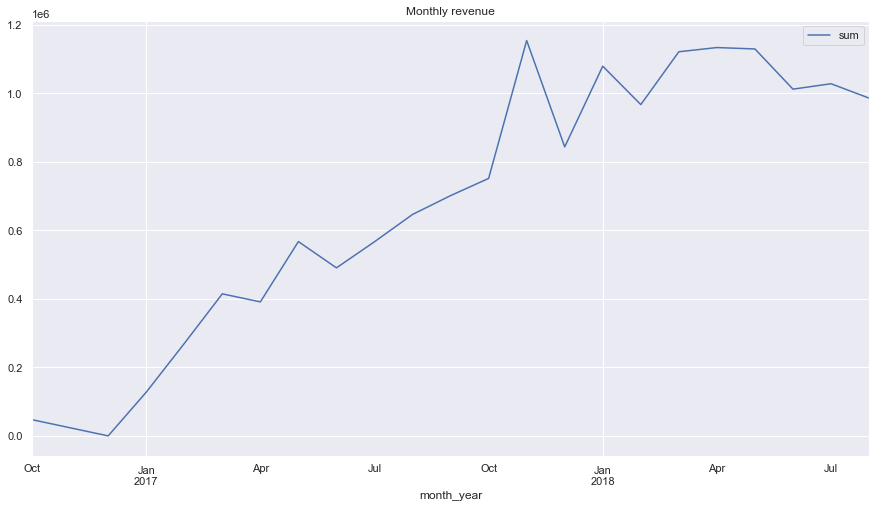

In [54]:
#sales over 2 years
monthly_profit.plot(figsize=(15,8),x='month_year', y='payment_value',title='Monthly revenue')

In [55]:
payments['payment_value'].max()

13664.08

In [56]:
Quarter_profit = time_revenue_df.groupby('Quarter',as_index=False).agg(
    {
     'payment_value':['sum']})
Quarter_profit

,Quarter,payment_value
,,sum
0,2016Q4,47290.82
1,2017Q1,811259.11
2,2017Q2,1448050.51
3,2017Q3,1913380.55
4,2017Q4,2747732.66
5,2018Q1,3165839.83
6,2018Q2,3273331.99
7,2018Q3,2012797.38


In [57]:
Quarter_profit.max()

Quarter                   2018Q3
payment_value  sum    3273331.99
dtype: object

<AxesSubplot:title={'center':'Monthly revenue'}, xlabel='Quarter'>

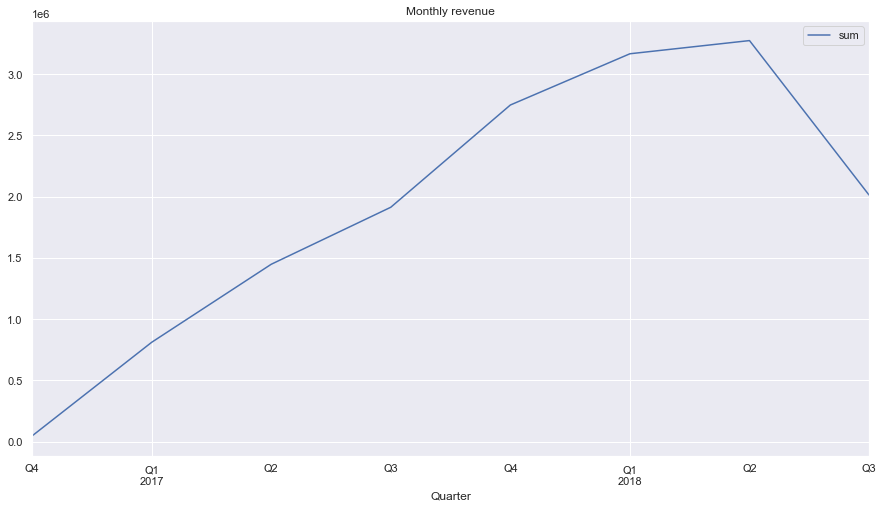

In [58]:
Quarter_profit[:].plot(figsize=(15,8),x='Quarter', y='payment_value',title='Monthly revenue')

Text(0, 0.5, 'payment_value')

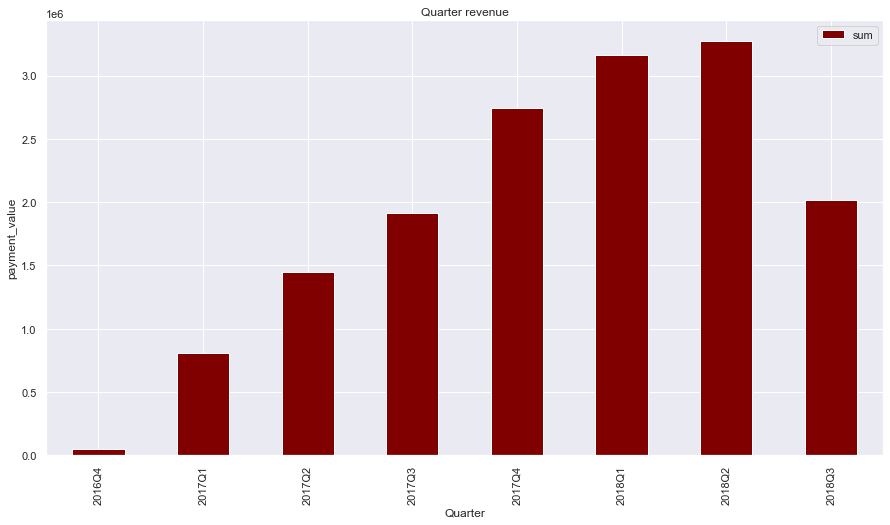

In [59]:
Quarter_profit[:].plot(figsize=(15,8),kind='bar',x='Quarter', y='payment_value',title='Quarter revenue',color ='maroon')
plt.xlabel("Quarter")
plt.ylabel("payment_value")

In [60]:
Quarter_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype        
---  ------                --------------  -----        
 0   (Quarter, )           8 non-null      period[Q-DEC]
 1   (payment_value, sum)  8 non-null      float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 192.0 bytes


In [61]:
reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [62]:
reviews.groupby('review_score').count()

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_score,,,,,,
1,11424,11424,1873,8745,11424,11424
2,3151,3151,478,2145,3151,3151
3,8179,8179,824,3557,8179,8179
4,19142,19142,1735,5976,19142,19142
5,57328,57328,6658,20554,57328,57328


<AxesSubplot:>

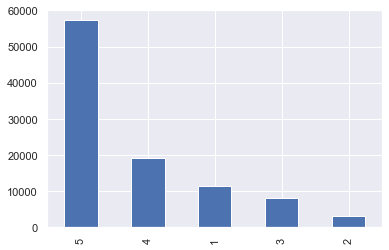

In [63]:
reviews['review_score'].value_counts().plot.bar()

In [64]:
time_revenue_df.head(1)

,order_id,order_purchase_timestamp,payment_type,payment_value,Year,Month,month_year,Date,Day_name,Hour,Quarter
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,credit_card,18.12,2017,10,2017-10,2,Monday,10,2017Q4


In [65]:
df_sales_dow = \
time_revenue_df.groupby(['Year', 'Day_name'], 
                        as_index=False).sum()

In [66]:
df_sales_dow.head(1)

,Year,Day_name,payment_value,Month,Date,Hour
0,2016,Friday,7116.31,412,303,573


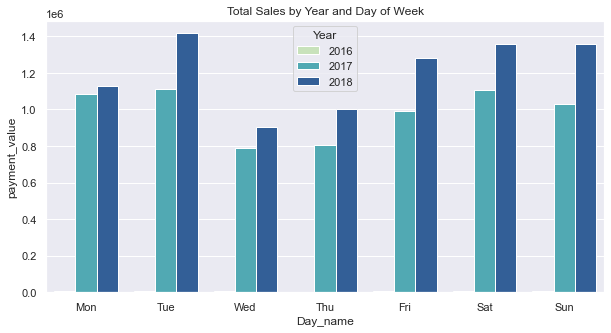

In [67]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Day_name', y='payment_value', hue='Year', 
         data=df_sales_dow, palette='YlGnBu')
ax.set_title('Total Sales by Year and Day of Week')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [68]:
customrs.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [69]:
orderspercutomer=pd.merge(customrs,orders,on='customer_id')
orderspercutomer.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [70]:
orderspercutomer['customer_unique_id'].duplicated().sum()

3119

In [71]:
orderspercutomer[['customer_id','customer_unique_id']].duplicated().sum()

0

In [72]:
loyal=orderspercutomer[orderspercutomer['customer_unique_id'].duplicated()]
loyal

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
650,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP,3c8194a8d47f5852dcd52ccbf364596e,delivered,2017-11-27 12:44:25,2017-11-27 12:56:18,2017-11-30 19:25:50,2017-12-01 17:05:02,2017-12-11 00:00:00
1410,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ,aec47b9987c836ffee2d7664b0929ec1,delivered,2017-10-10 18:31:36,2017-10-10 18:49:10,2017-10-13 17:07:01,2017-10-20 18:29:16,2017-11-17 00:00:00
2720,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG,ef66cc60de5221417b5fb81b1c42de85,delivered,2018-03-31 15:08:21,2018-03-31 16:20:05,2018-04-03 16:31:15,2018-04-06 19:06:35,2018-05-04 00:00:00
3519,b59240e14630c3dad40626dcdaf69b18,5faabfe6772088c4d906b63fa81ac63d,95047,caxias do sul,RS,7652086d66b18b3e2f19c1a28d6cc670,delivered,2017-07-18 12:35:54,2017-07-18 12:50:48,2017-07-18 21:15:47,2017-07-31 21:04:27,2017-08-09 00:00:00
3668,c9f8da8278a23eb777ede2591b9ad3ee,c2551ea089b7ebbc67a2ea8757152514,44380,cruz das almas,BA,b2ae55d11609779855c398bc2bd74fd4,delivered,2017-05-27 16:15:38,2017-05-27 16:25:09,2017-05-29 13:09:24,2017-06-08 12:03:23,2017-06-29 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
96346,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,3aefaf9d41208dba8b2c336def99b00f,delivered,2017-10-29 11:59:50,2017-10-30 10:12:39,2017-10-31 18:42:00,2017-11-06 21:18:53,2017-11-24 00:00:00
96349,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG,46984ee8227e1926e055327b55ad576c,delivered,2017-12-13 17:35:26,2017-12-15 02:17:39,2017-12-19 20:33:02,2018-01-05 22:24:41,2018-01-22 00:00:00
96358,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP,181ff95f97fee531c4afa9e882186f18,delivered,2018-06-20 14:16:20,2018-06-20 14:38:41,2018-06-20 15:02:00,2018-06-27 13:18:47,2018-07-18 00:00:00
96374,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES,0e48ca107de4291a6f7536b4f5cf512e,delivered,2018-05-15 10:39:41,2018-05-15 14:30:29,2018-05-15 15:55:00,2018-05-22 19:42:12,2018-06-12 00:00:00


In [73]:
loyal.groupby('customer_unique_id')['order_id'].count().max()

14

In [74]:
toployal=loyal['customer_unique_id'].value_counts()[1:20]
toployal

3e43e6105506432c953e165fb2acf44c    8
ca77025e7201e3b30c44b472ff346268    6
1b6c7548a2a1f9037c1fd3ddfed95f33    6
6469f99c1f9dfae7733b25662e7f1782    6
63cfc61cee11cbe306bff5857d00bfe4    5
dc813062e0fc23409cd255f7f53c7074    5
12f5d6e1cbf93dafd9dcc19095df0b3d    5
f0e310a6839dce9de1638e0fe5ab282a    5
47c1a3033b8b77b3ab6e109eb4d5fdf3    5
394ac4de8f3acb14253c177f0e15bc58    4
fe81bb32c243a86b2f86fbf053fe6140    4
4e65032f1f574189fb793bac5a867bbc    4
b4e4f24de1e8725b74e4a1f4975116ed    4
de34b16117594161a6a89c50b289d35a    4
56c8638e7c058b98aae6d74d2dd6ea23    4
74cb1ad7e6d5674325c1f99b5ea30d82    4
5e8f38a9a1c023f3db718edcf926a2db    4
35ecdf6858edc6427223b64804cf028e    4
ec7f1811826ab04a27a92197bc40c888    3
Name: customer_unique_id, dtype: int64

<AxesSubplot:title={'center':'toployal'}, xlabel='customer uniqe_id', ylabel='orders'>

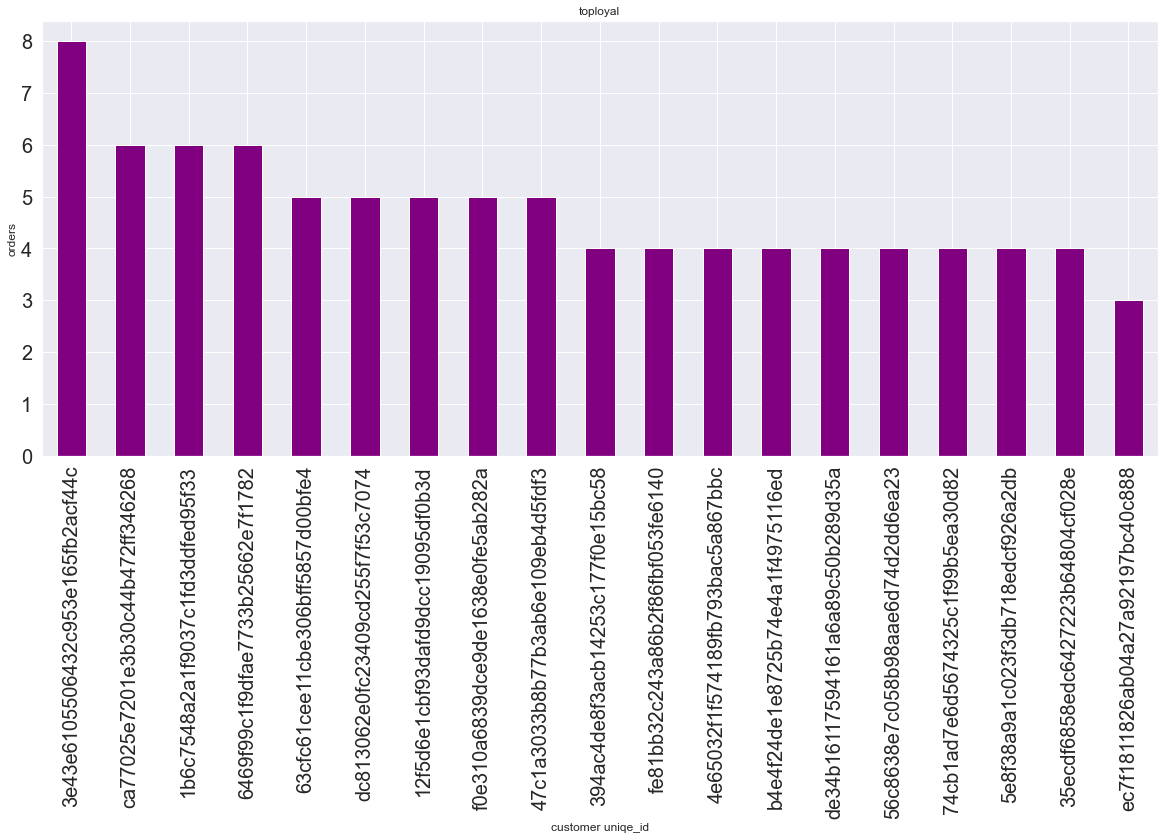

In [75]:
toployal.plot.bar(figsize=(20,8),title='toployal',color='purple',xlabel='customer uniqe_id',ylabel='orders',fontsize=20)